This dataset contains a wealth of information from 52,000 loan applications, offering detailed insights into the factors that influence loan approval decisions. Collected from financial institutions, this data is highly valuable for credit risk analysis, financial modeling, and predictive analytics. The dataset is particularly useful for anyone interested in applying machine learning techniques to real-world financial decision-making scenarios.

**Overview**:
This dataset provides information about various applicants and the loans they applied for, including their demographic details, income, loan terms, and approval status. By analyzing this data, one can gain an understanding of which factors are most critical for determining the likelihood of loan approval. The dataset can also help in evaluating credit risk and building robust credit scoring systems.

**Dataset Columns**:
Applicant_ID: Unique identifier for each loan application.

Gender: Gender of the applicant (Male/Female).

Age: Age of the applicant.

Marital_Status: Marital status of the applicant (Single/Married).

Dependents: Number of dependents the applicant has.

Education: Education level of the applicant (Graduate/Not Graduate).

Employment_Status: Employment status of the applicant (Employed, Self-Employed, Unemployed).

Occupation_Type: Type of occupation, which provides insights into the nature of the applicant’s job (Salaried, Business, Others).

Residential_Status: Type of residence (Owned, Rented, Mortgage).

City/Town: The city or town where the applicant resides.

Annual_Income: The total annual income of the applicant, a key factor in loan eligibility.

Monthly_Expenses: The monthly expenses of the applicant, indicating their financial obligations.

Credit_Score: The applicant's credit score, reflecting their creditworthiness.

Existing_Loans: Number of existing loans the applicant is servicing.

Total_Existing_Loan_Amount: The total amount of all existing loans the applicant has.

Outstanding_Debt: The remaining amount of debt yet to be paid by the applicant.

Loan_History: The applicant’s previous loan history (Good/Bad), indicating their repayment reliability.

Loan_Amount_Requested: The loan amount the applicant has applied for.

Loan_Term: The term of the loan in months.

Loan_Purpose: The purpose of the loan (e.g., Home, Car, Education, Personal, Business).

Interest_Rate: The interest rate applied to the loan.

Loan_Type: The type of loan (Secured/Unsecured).

Co-Applicant: Indicates if there is a co-applicant for the loan (Yes/No).

Bank_Account_History: Applicant’s banking history, showing past transactions and reliability.

Transaction_Frequency: The frequency of financial transactions in the applicant’s bank account (Low/Medium/High).

Default_Risk: The risk level of the applicant defaulting on the loan (Low/Medium/High).

Loan_Approval_Status: Final decision on the loan application (Approved/Rejected).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.__version__

'1.26.4'

In [4]:
df = pd.read_csv('loan_dataset.csv')
df.head()

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [5]:
df.columns = df.columns.str.lower()

df.tail()

,applicant_id,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,...,loan_amount_requested,loan_term,loan_purpose,interest_rate,loan_type,co-applicant,bank_account_history,transaction_frequency,default_risk,loan_approval_status
51995,51996,Female,47,Divorced,1,High School,Self-Employed,Professional,Own,Urban,...,15723,60,Home,12.52,Secured,Yes,2,26,0.61,1
51996,51997,Male,25,Married,3,High School,Self-Employed,Freelancer,Rent,Urban,...,21209,237,Vehicle,5.21,Unsecured,No,8,26,0.04,1
51997,51998,Female,48,Married,0,High School,Unemployed,Business,Rent,Urban,...,10540,60,Education,10.60,Unsecured,No,8,24,0.31,0
51998,51999,Female,48,Divorced,1,High School,Employed,Business,Own,Urban,...,16765,32,Vehicle,8.11,Secured,Yes,3,12,0.34,0
51999,52000,Female,38,Single,2,High School,Self-Employed,Freelancer,Own,Urban,...,20454,93,Education,11.57,Unsecured,Yes,3,25,0.34,1


In [6]:
df.isnull().sum()

applicant_id                  0
gender                        0
age                           0
marital_status                0
dependents                    0
education                     0
employment_status             0
occupation_type               0
residential_status            0
city/town                     0
annual_income                 0
monthly_expenses              0
credit_score                  0
existing_loans                0
total_existing_loan_amount    0
outstanding_debt              0
loan_history                  0
loan_amount_requested         0
loan_term                     0
loan_purpose                  0
interest_rate                 0
loan_type                     0
co-applicant                  0
bank_account_history          0
transaction_frequency         0
default_risk                  0
loan_approval_status          0
dtype: int64

In [7]:
df.describe()

,applicant_id,age,dependents,annual_income,monthly_expenses,credit_score,existing_loans,total_existing_loan_amount,outstanding_debt,loan_history,loan_amount_requested,loan_term,interest_rate,bank_account_history,transaction_frequency,default_risk,loan_approval_status
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,26000.500000,38.898385,1.498000,83588.474404,2748.064885,678.089019,0.997865,24939.087962,14984.864923,0.198596,21102.765481,125.827019,9.253494,4.503923,17.031808,0.500204,0.641654
std,15011.251336,10.553928,1.118077,35720.851522,1295.678763,159.990367,0.815586,14407.886552,8663.404305,0.398947,8224.940906,65.509959,3.318356,2.872721,7.212011,0.289939,0.479519
min,1.000000,18.000000,0.000000,20009.000000,500.000000,300.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,12.000000,3.500000,0.000000,5.000000,0.000000,0.000000
25%,13000.750000,31.000000,0.000000,55564.000000,1636.000000,553.000000,0.000000,12498.000000,7511.750000,0.000000,16941.750000,69.000000,6.400000,2.000000,11.000000,0.250000,0.000000
50%,26000.500000,38.000000,1.000000,78839.000000,2739.000000,742.000000,1.000000,24964.000000,14984.500000,0.000000,21039.000000,126.000000,9.240000,5.000000,17.000000,0.500000,1.000000
75%,39000.250000,45.000000,2.000000,114226.000000,3866.000000,796.000000,2.000000,37399.500000,22432.250000,0.000000,25809.000000,182.000000,12.140000,7.000000,23.000000,0.750000,1.000000
max,52000.000000,69.000000,3.000000,149998.000000,4999.000000,849.000000,2.000000,49999.000000,29998.000000,1.000000,44848.000000,239.000000,15.000000,9.000000,29.000000,1.000000,1.000000


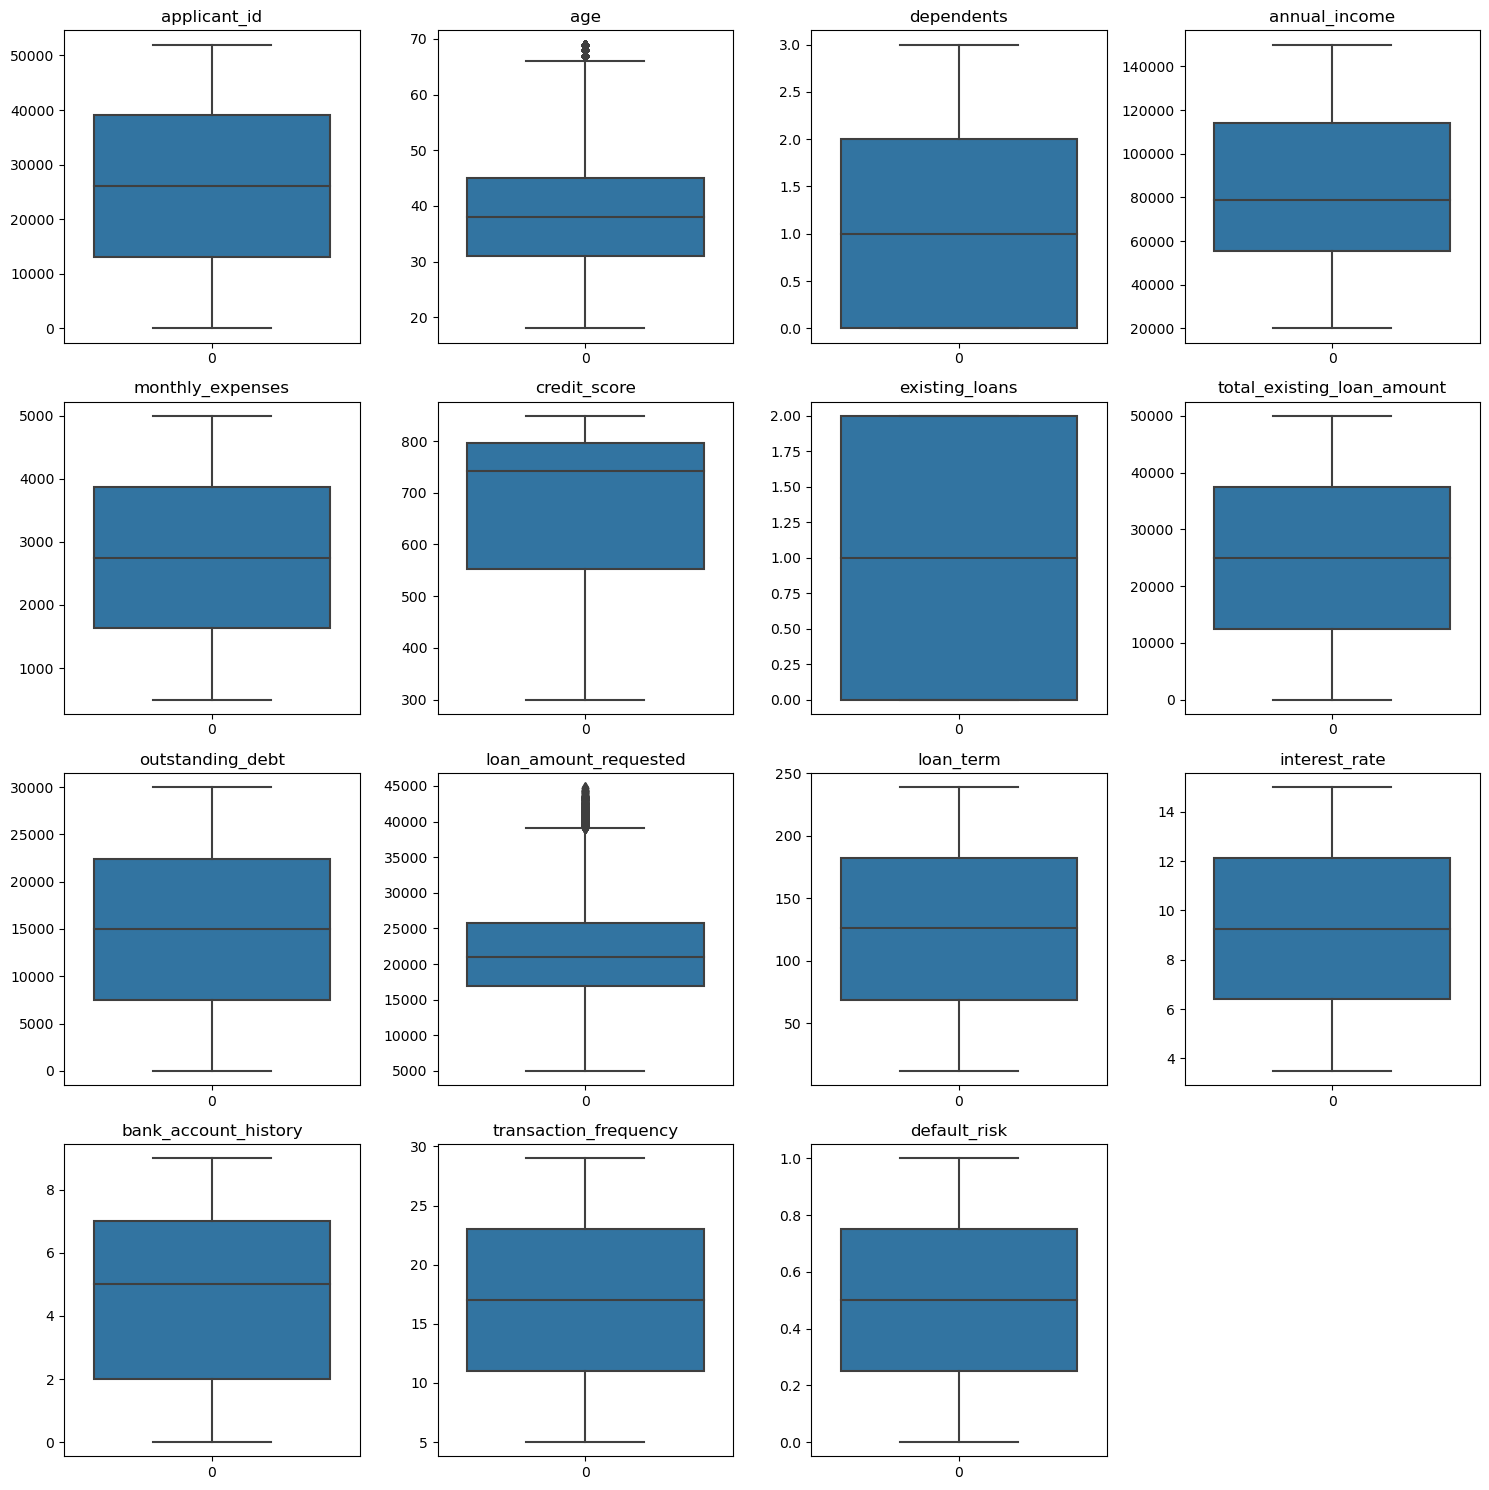

In [8]:
# outlier handle
int_float_columns = ['applicant_id', 'age', 'dependents', 'annual_income',
       'monthly_expenses', 'credit_score', 'existing_loans',
       'total_existing_loan_amount', 'outstanding_debt',
       'loan_amount_requested', 'loan_term', 'interest_rate',
       'bank_account_history', 'transaction_frequency', 'default_risk']

# วาด boxplot สำหรับแต่ละฟีเจอร์
plt.figure(figsize=(15, 15))
for i, column in enumerate(int_float_columns, 1):
    plt.subplot(4, 4, i)  # สร้าง subplot ขนาด 4x4 (สามารถปรับขนาดตามจำนวนฟีเจอร์)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [28]:
df['interest_rate'].describe()

count    50499.000000
mean         9.246964
std          3.317710
min          3.500000
25%          6.390000
50%          9.230000
75%         12.130000
max         15.000000
Name: interest_rate, dtype: float64

In [9]:
df = df[df['loan_amount_requested'] <= 40000]
df.shape

(51361, 27)

In [22]:
df['age'].quantile([0,0.75,0.85,0.98,1])

0.00    18.0
0.75    45.0
0.85    48.0
0.98    66.0
1.00    69.0
Name: age, dtype: float64

In [23]:
df = df[df['age'] <= 66]
df.shape

(50499, 27)

In [24]:
cate_features = df.select_dtypes(include=['object']).columns

for col in cate_features:
    print('#' * 50)
    print(df[col].value_counts())
    

##################################################
gender
Female    25267
Male      25232
Name: count, dtype: int64
##################################################
marital_status
Married     25192
Single      20203
Divorced     5104
Name: count, dtype: int64
##################################################
education
Graduate        20211
High School     20165
Postgraduate    10123
Name: count, dtype: int64
##################################################
employment_status
Employed         25138
Self-Employed    15299
Unemployed       10062
Name: count, dtype: int64
##################################################
occupation_type
Professional    12801
Salaried        12656
Freelancer      12577
Business        12465
Name: count, dtype: int64
##################################################
residential_status
Own      30297
Rent     15117
Other     5085
Name: count, dtype: int64
##################################################
city/town
Urban       30295
Suburban    15152
Ru

In [25]:
# นับจำนวนแถวซ้ำ
df.duplicated().sum()

0

In [27]:
df.to_csv('loan_cleaned.csv', index=False)